## Customer Segmentation and Analysis using KMeans
In the bootcamp session we had worked on segmentation using Age and Spending Score.
The assignment is to do the same for Spending Score and Annual Income.

Kindly complete the following steps:
1. Apply KMeans with a range of K values (number of clusters) and store the inertia.
2. Plot the inertia values as a elbow curve to decide the optimal number of clusters.
3. Run the KMeans algorithm with the desired number of clusters and plot the results using a scatter plot.

### Importing required libraries

In [24]:
import matplotlib.pyplot as plt #
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import time
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from datetime import datetime, timedelta
warnings.filterwarnings('ignore')
%matplotlib inline

### Data Load
    

In [25]:
data = pd.read_csv('customers.csv')
data.head()
data.tail()
data.info()
data.describe()
data.dtypes
data.shape
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# # Segmentation using  Annual Income and Spending Score

KMeans: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

iloc: http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html

In [26]:
'''
spending score and annual income 
'''
x1 = data[['Spending Score (1-100)' , 'Annual Income (k$)']].iloc[: , :].values
inertia = []
for n in range(1,11):
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(x1)
    inertia.append(algorithm.inertia_)
    
print(inertia)

[269981.28, 181363.59595959596, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37239.83554245604, 30241.34361793659, 25037.601066566283, 21850.165282585633, 19649.59658286696]


### Plot the Elbow curve

Pyplot: https://matplotlib.org/3.1.0/tutorials/introductory/pyplot.html

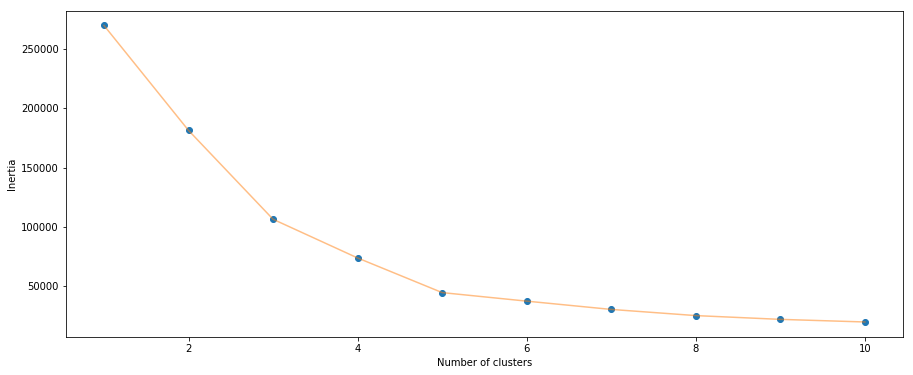

In [27]:
plt.figure(1, figsize = (15,6))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of clusters'), plt.ylabel('Inertia')
plt.show()

### Apply KMeans with desired number of clusters

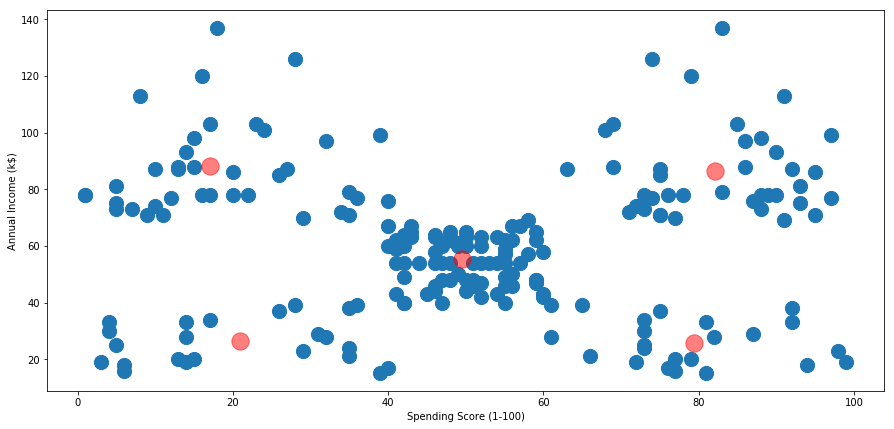

In [28]:
algorithm = (KMeans(n_clusters = 5, n_init = 10, max_iter=300))
algorithm.fit(x1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_
# z = algorithm.predict(data)
#def
plt.figure(1, figsize = (15,7))
plt.clf()
plt.scatter(x='Spending Score (1-100)', y= 'Annual Income (k$)', data= data, s= 200)
plt.scatter(x= centroids1[: , 0], y= centroids1[: , 1], c = 'red',alpha = 0.5, s= 300)
plt.ylabel('Annual Income (k$)') , plt.xlabel('Spending Score (1-100)')
plt.show()

### Plot the results using a scatter plot

Scatter Plot: https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html

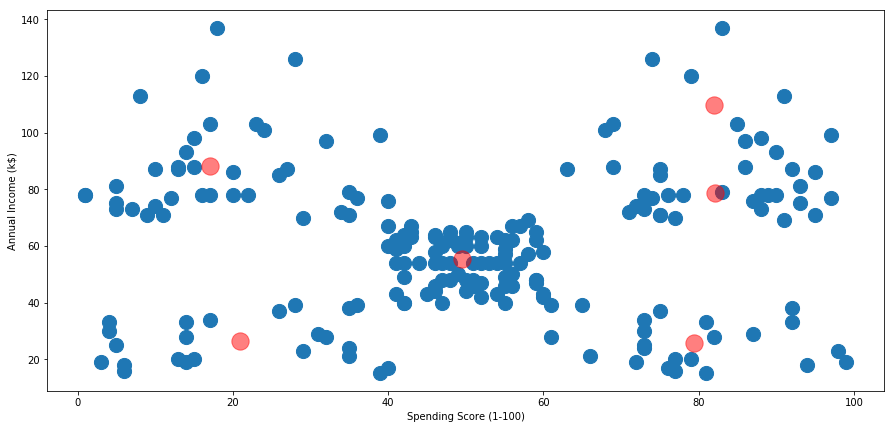

In [30]:
algorithm = (KMeans(n_clusters = 6, n_init = 10, max_iter=300))
algorithm.fit(x1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_
# z = algorithm.predict(data)
#def
plt.figure(1, figsize = (15,7))
plt.clf()
plt.scatter(x='Spending Score (1-100)', y= 'Annual Income (k$)', data= data, s= 200)
plt.scatter(x= centroids1[: , 0], y= centroids1[: , 1], c = 'red',alpha = 0.5, s= 300)
plt.ylabel('Annual Income (k$)') , plt.xlabel('Spending Score (1-100)')
plt.show()

In [ ]:
'''
Observation : -
I tried ploting scatter plot for n_clusters = 5 and n_clusters = 6. but suitable number of clusters is 5.
'''